In [22]:
%load_ext autoreload
%autoreload 2
import constrained as cd
import constrained.constraints as con

In [47]:
@cd.element
def layer(width, node_radius=cd.VarPlaceholder()):
    nodes = [cd.primitive.Circle(radius=node_radius, style=cd.Style(fill="black")) for _ in range(width)]
    spacing = cd.Var()
    return cd.Group(nodes, [
        con.distributed_vertically(nodes, spacing=spacing),
        con.aligned_vertically(nodes)
    ])

Solved 119 constraints in 0.015s


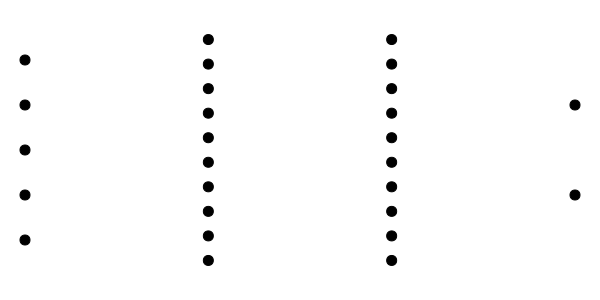

In [106]:
width = 600
height = 300
node_radius = 5
figure_padding = 20

layers = [layer(5, node_radius), layer(10, node_radius), layer(10, node_radius), layer(2, node_radius)]

content = cd.Group(layers, [
    con.aligned_horizontally(layers),
    con.distributed_horizontally(layers)
])

bg = cd.Rect(top_left=(0, 0), width=width, height=height, style=cd.Style(fill="white", outline=None))
canvas = cd.Canvas(width, height, cd.Group([bg, content], [con.inset(content, bg, figure_padding, figure_padding)]))

cd.solve(canvas)